In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as lm
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn import preprocessing

In [2]:
housedf=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/housing.csv")

In [3]:
housedf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# FEATURE EXTRACTION


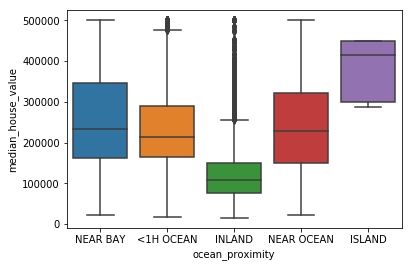

In [4]:
sns.boxplot(y="median_house_value",x="ocean_proximity",data=housedf)

In [5]:
housedf.drop(["latitude","longitude"],axis=1,inplace=True)

In [6]:
housedf1=housedf.drop("ocean_proximity",axis=1)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


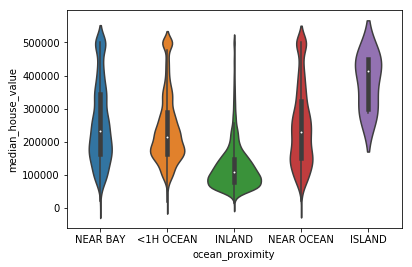

In [7]:
sns.violinplot(y="median_house_value",x="ocean_proximity",data=housedf)

In [8]:
housedf1.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


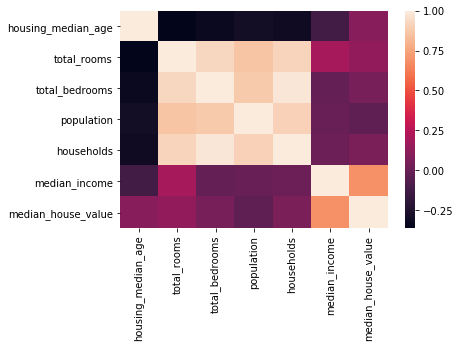

In [9]:
sns.heatmap(housedf1.corr())

In [10]:
ser=pd.Series([10,np.nan,20,30,np.nan,50])

In [11]:
ser

0    10.0
1     NaN
2    20.0
3    30.0
4     NaN
5    50.0
dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


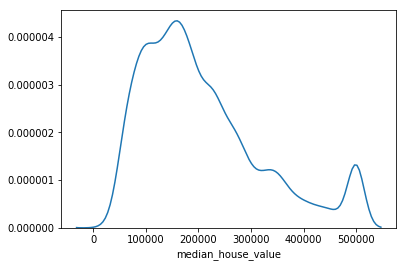

In [12]:
sns.distplot(housedf1.median_house_value,hist=False)

In [13]:
ser.isnull().sum()

2

In [14]:
housedf1.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [15]:
housedf1.isnull().sum()/housedf1.shape[0]

housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

In [16]:
housedf1.dropna(inplace=True)

In [17]:
housedf["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

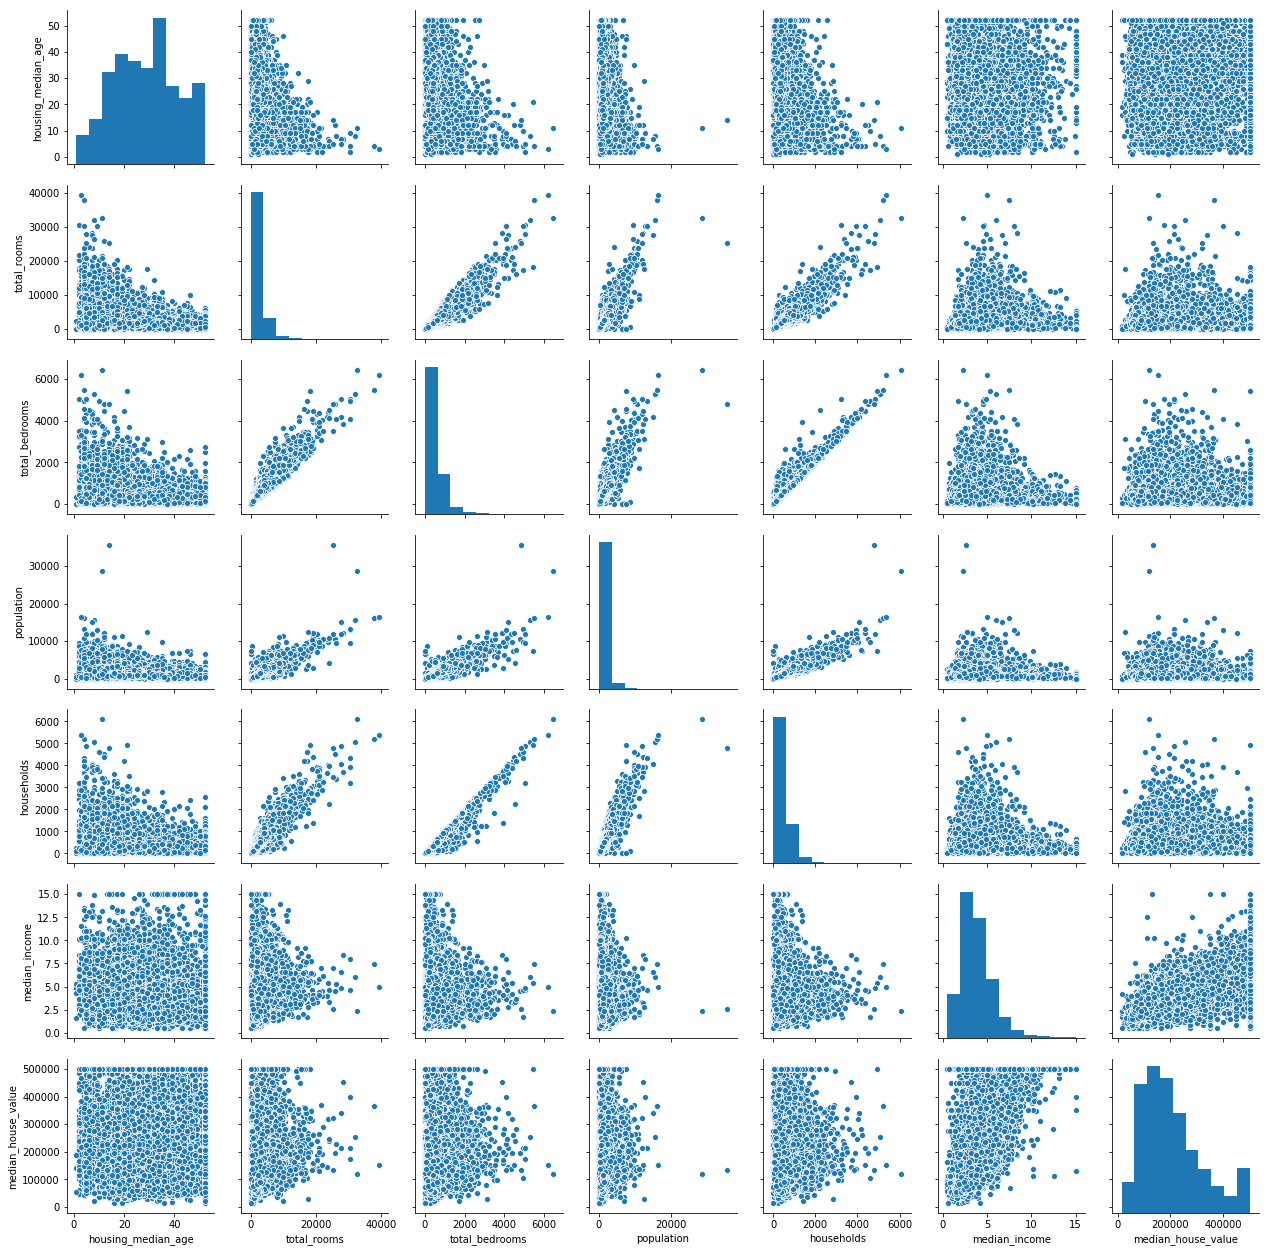

In [18]:
sns.pairplot(housedf1)

In [19]:
housedf.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [20]:
housedf[housedf["median_house_value"]==500001]["ocean_proximity"].value_counts()

<1H OCEAN     532
NEAR OCEAN    212
NEAR BAY      194
INLAND         27
Name: ocean_proximity, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


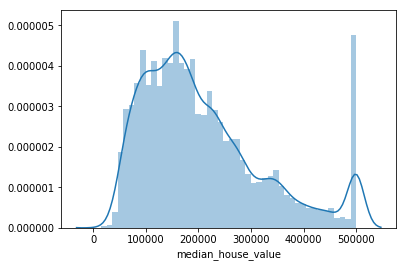

In [21]:
sns.distplot(housedf1.median_house_value)

In [22]:
housedf1.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
Name: median_house_value, dtype: float64

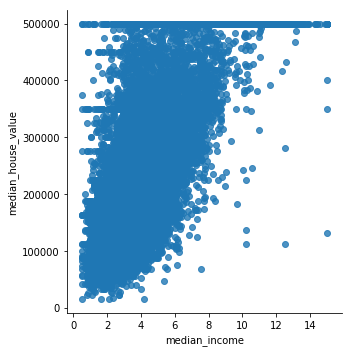

In [23]:
sns.lmplot(y="median_house_value",x="median_income",data=housedf1,fit_reg=False)

In [24]:
np.max(housedf1["median_house_value"]) #maximum value

500001.0

In [25]:
housedf1[housedf1["median_house_value"]==housedf1["median_house_value"].max()].shape[0]

958

MAMDO BAJI NAKI 958 KHANA BARI WITH THE SAME VALUE ETA KI SIMS KHELCHIS TUI ?
INTEGER OVERFLOW BOKA CHODA


In [26]:
housedf2=housedf1.drop(housedf1[housedf1["median_house_value"]==housedf1["median_house_value"].max()].index)

In [27]:
housedf2["median_house_value"].max()

500000.0

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


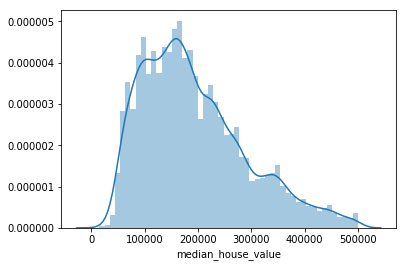

In [28]:
sns.distplot(housedf2.median_house_value)

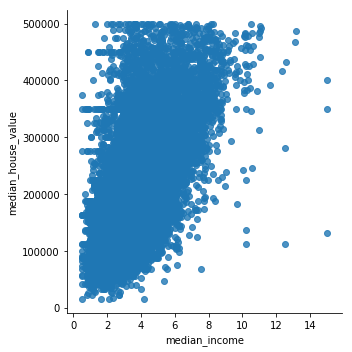

In [29]:
sns.lmplot(x="median_income",y="median_house_value",data=housedf2,fit_reg=False)

In [30]:
housedf2.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,192444.651913
std,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,97702.625782
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,116500.000000
50%,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,173800.000000
75%,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,248100.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


In [31]:
housedf2.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642733
total_rooms           0.142188
households            0.093890
total_bedrooms        0.074672
housing_median_age    0.068595
population            0.011153
Name: median_house_value, dtype: float64

In [32]:
housedf2["pop_house"]=housedf2.population/housedf2.households

In [33]:
housedf2["bedroom_rooms"]=housedf2.total_bedrooms/housedf2.total_rooms

In [34]:
housedf2.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642733
total_rooms           0.142188
households            0.093890
total_bedrooms        0.074672
housing_median_age    0.068595
population            0.011153
pop_house            -0.021388
bedroom_rooms        -0.215950
Name: median_house_value, dtype: float64

In [35]:
housedf2.total_rooms.describe()

count    19475.000000
mean      2620.491142
std       2184.938093
min          2.000000
25%       1441.000000
50%       2111.000000
75%       3118.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [36]:
avg=housedf2.total_rooms.mean()
std=housedf2.total_rooms.std()
(housedf2.total_rooms - avg)/std

0       -0.796586
1        2.049719
2       -0.527929
3       -0.616261
4       -0.454700
5       -0.778737
6       -0.039127
7        0.221292
8       -0.029974
9        0.424959
10      -0.191535
11       0.403906
12      -0.059265
13      -0.880799
14       0.010302
15      -0.686743
16      -0.299547
17      -0.637314
18      -0.174600
19      -0.511452
20      -0.855627
21      -0.449208
22      -0.084438
23      -0.426781
24      -0.181466
25      -0.954485
26      -0.682166
27      -0.330669
28      -0.246456
29      -0.865696
           ...   
20610   -0.224487
20611   -0.383302
20612   -0.569120
20613   -0.408474
20614   -0.157666
20615   -0.706881
20616   -0.370945
20617   -0.942586
20618   -0.589715
20619   -0.333873
20620   -1.108723
20621   -0.629991
20622   -0.853796
20623   -0.669351
20624   -0.422205
20625   -1.152660
20626   -0.684912
20627   -1.035494
20628   -0.264305
20629    3.393464
20630    0.008929
20631    0.015794
20632   -0.137986
20633   -0.247371
20634   -0

In [37]:
X = housedf2.drop("median_house_value",axis=1)
y = housedf2.median_house_value

In [38]:
stdscalar=preprocessing.StandardScaler()

In [39]:
X_scaled=stdscalar.fit_transform(X)

In [40]:
X_scaled[:1,:]

array([[ 1.00853966, -0.79660647, -0.97216729, -0.97721086, -0.978854  ,
         2.96226953, -0.05058454, -1.20108825]])

In [41]:
X.iloc[:1,:]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_house,bedroom_rooms
0,41.0,880.0,129.0,322.0,126.0,8.3252,2.555556,0.146591


In [42]:
X_scale=pd.DataFrame(X_scaled,columns=X.columns.values)

In [43]:
mmscaled=preprocessing.MinMaxScaler()
X_mmscaled=mmscaled.fit_transform(X)
X_mmscale=pd.DataFrame(X_mmscaled,columns=X.columns.values)

In [45]:
Xtrain,Xtest,ytrain,ytest=ms.train_test_split(X_scale,y,test_size=.25,random_state=42)
model=lm.LinearRegression()
model.fit(Xtrain,ytrain)
yhat=model.predict(Xtest)
model.score(Xtrain,ytrain)

0.5390124026110201

In [46]:
np.sqrt(metrics.mean_squared_error(ytest,yhat))

65821.06854149302

In [47]:
housedf2["median_income"].describe()


count    19475.000000
mean         3.676739
std          1.569263
min          0.499900
25%          2.526500
50%          3.451900
75%          4.583300
max         15.000100
Name: median_income, dtype: float64

In [49]:
#straified sampling
#nearest neighbour gets affected by the scaling problem 

there are 2 types of machine learning parametric and non parametric 
parametric model generates a model 
non parametric doesn ot generate a model
machine learning is trial and error in an organized way 
Example of a non parametric machine learning algorithm is K nearest neighbour
Starting out with machine learning is to make a very simple model use correlation and shit find mse then scale then mse rmse that is how you begin 


In [50]:
X_scale[:10]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_house,bedroom_rooms
0,1.008540,-0.796606,-0.972167,-0.977211,-0.978854,2.962270,-0.050585,-1.201088
1,-0.589536,2.049772,1.340793,0.839509,1.662088,2.947103,-0.092295,-1.039402
2,1.887481,-0.527942,-0.827755,-0.825162,-0.845763,2.281805,-0.027498,-1.500988
3,1.887481,-0.616276,-0.721222,-0.770984,-0.736159,1.253079,-0.051297,-0.535993
4,1.887481,-0.454712,-0.614688,-0.764867,-0.631774,0.107990,-0.085592,-0.753125
5,1.887481,-0.778757,-0.773305,-0.897691,-0.804009,0.229452,-0.089482,0.295041
6,1.887481,-0.039128,-0.119899,-0.302604,0.033681,-0.011241,-0.090558,-0.387737
7,1.887481,0.221297,0.348848,-0.247552,0.380761,-0.354787,-0.122390,0.111564
8,1.088443,-0.029975,0.296765,-0.204733,0.245061,-1.017280,-0.100058,0.795614
9,1.887481,0.424970,0.396196,0.096743,0.555606,0.009215,-0.086453,-0.276881


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


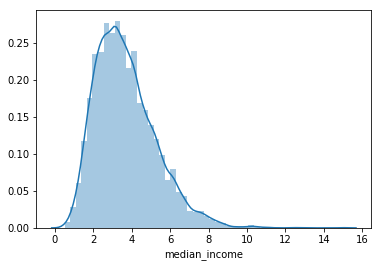

In [51]:
sns.distplot(housedf2.median_income)

In [65]:
housedf2["income_cat"]=np.ceil(housedf2["median_income"]/1.5)


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


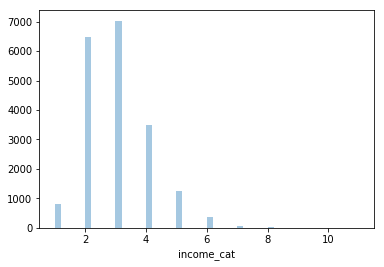

In [67]:
sns.distplot(housedf2.income_cat,kde=False)

In [69]:
housedf2["income_cat"]=np.where(housedf2.income_cat>5,5,housedf2.income_cat)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


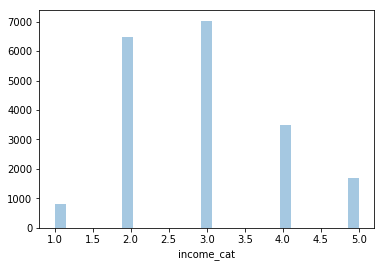

In [70]:
sns.distplot(housedf2.income_cat,kde=False)

In [72]:
housedf2.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642733
income_cat            0.611313
total_rooms           0.142188
households            0.093890
total_bedrooms        0.074672
housing_median_age    0.068595
population            0.011153
pop_house            -0.021388
bedroom_rooms        -0.215950
Name: median_house_value, dtype: float64

In [73]:
housedf3=housedf2.drop("median_income",axis=1)

In [80]:
X = housedf3.drop("median_house_value",axis=1)
y = housedf3.median_house_value
Xtrain,Xtest,ytrain,ytest=ms.train_test_split(X,y,test_size=.25,random_state=42)
model=lm.LinearRegression()
model.fit(Xtrain,ytrain)
yhat=model.predict(Xtest)
model.score(Xtrain,ytrain)

0.47654485433591587

In [81]:
X = housedf3[["income_cat","total_rooms","households"]]
y = housedf3.median_house_value

In [82]:
Xtrain,Xtest,ytrain,ytest=ms.train_test_split(X,y,test_size=.25,random_state=42)
model=lm.LinearRegression()
model.fit(Xtrain,ytrain)
yhat=model.predict(Xtest)
model.score(Xtrain,ytrain)

0.39430363624268316

In [86]:
#Decision Tree
from sklearn import tree
treemodel=tree.DecisionTreeRegressor()
treemodel.fit(Xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
yhat=treemodel.predict(Xtest)
np.sqrt(metrics.mean_squared_error(ytest,yhat))

103978.7404537017

# CROSS VALIDATION

The initial set that is produced is not in our hands 
it can be good or it can be bad
mo

In [91]:
X

,income_cat,total_rooms,households
0,5.0,880.0,126.0
1,5.0,7099.0,1138.0
2,5.0,1467.0,177.0
3,4.0,1274.0,219.0
4,3.0,1627.0,259.0
5,3.0,919.0,193.0
6,3.0,2535.0,514.0
7,3.0,3104.0,647.0
8,2.0,2555.0,595.0
9,3.0,3549.0,714.0


In [99]:
X=housedf3.drop("median_house_value",axis=1)
model=lm.LinearRegression()
scores=ms.cross_val_score(model,X,y,cv=4,scoring="r2")

In [100]:
scores

array([0.46105373, 0.44478303, 0.3659668 , 0.43486478])

In [102]:
#RFE recursive feature elimination 
#select k best 


In [ ]:
from sklearn import feature_extraction
feature_selection.SelectkBest